In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install textparser

In [0]:
!cp -R /content/drive/My\ Drive/CSE253 ./CSE253

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 300
plt.ion()   # interactive mode

In [0]:
import textparser
from textparser import Sequence, Optional, choice, Not, Any, NoMatch, ZeroOrMore, Repeated, Forward
from pprint import pprint
import tokenize
import sys


class Parser(textparser.Parser):
  def token_specs(self):
      return [
          ('SKIP',                r'[ \r\n\t]+'),
          ('NUMBER',              r'-?\d+(\.\d+)?([eE][+-]?\d+)?'),
          ('STRING',              r'\w+(\s*\w+)?'),
          ('COMMA',          ',', r','),
          ('COLON',          ':', r':'),
          ('TRUE',                r'true'),
          ('FALSE',               r'false'),
          ('NULL',                r'null'),
          ('LPAREN',         '(', r'\('),
          ('RPAREN',         ')', r'\)'),
          ('LBRACKET',       '[', r'\['),
          ('RBRACKET',       ']', r'\]'),
          ('LBRACE',         '{', r'\{'),
          ('RBRACE',         '}', r'\}'),
          ('MISMATCH',            r'.')
      ]

  def grammar(self):
      value = Forward()
      info  = Sequence('STRING', ':', 'NUMBER', 'STRING', ':', 'NUMBER', 'STRING', ':', 'NUMBER')
      tup_  = Sequence('STRING', ':', choice(info, 'NUMBER'))
      value <<= choice(tup_,
                        'STRING',
                        'NUMBER',
                        'TRUE',
                        'FALSE',
                        'NULL')

      return value

def transform(token):
  if isinstance(token, list):
    if isinstance(token[2], list):
        tokens = [token[2][i:i+3] for i in range(0, len(token[2]), 3)]
        return [transform(token[0]), {transform(elem[0]): transform(elem[2]) for elem in tokens}]
    elif isinstance(token[0], textparser.Token):
        return [transform(token[0]), transform(token[2])]
    else:
        return {}
  elif token.kind == 'ESCAPED_STRING':
      return token.value[1:-1]
  elif token.kind == 'NUMBER':
      return float(token.value)
  elif token.kind == 'TRUE':
      return True
  elif token.kind == 'FALSE':
      return False
  elif token.kind == 'STRING':
      return token.value
  else:
      return None


In [0]:
def parse_file(filepath, results):
  with open(filepath) as fp:
    line = fp.readline()
    while line:
      tok_str = ' '.join(line.strip().replace('\t', ' ').split())
      tree = None
      try:
        tree = Parser().parse(tok_str, token_tree=True)
        ttree = transform(tree)
      except Exception: True
      if tree:
        if ttree[0] == 'Best Loss':
          results[ttree[0]]['Loss'].append(ttree[1])
        else:
          results[ttree[0]]['Loss'].append(ttree[1]['Loss'])
          results[ttree[0]]['Accuracy'].append(ttree[1]['Accuracy'])
          results[ttree[0]]['IoU'].append(ttree[1]['IoU'])
      line = fp.readline()


In [0]:
def print_plot(results, eval_type, name="Learning Curve", file_name='file_name'):
  epochs = range(1, len(results['Training Check'][eval_type])+1)
  print(len(results['Training Check'][eval_type]))
  plt.figure()
  plt.plot(epochs, results['Training Check'][eval_type], label='Training loss')
  plt.plot(epochs, results['Validation Results'][eval_type][1:], label='Validation loss')
  plt.legend()
  plt.title(name)
  plt.xlabel('Epoch')
  plt.ylabel(eval_type)
  plt.xticks([i for i in range(0, len(epochs), 10)])
  plt.savefig(file_name, bbox_inches='tight', dpi=600)
  plt.show()


99


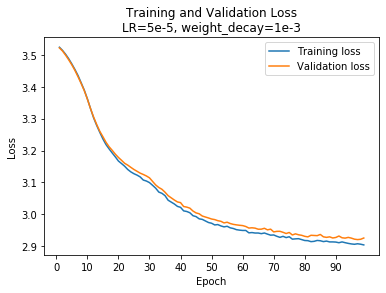

99


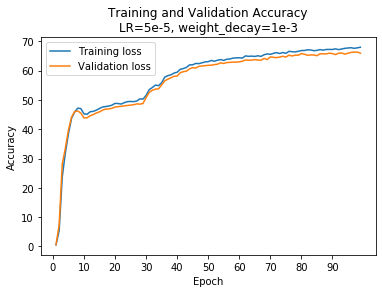

99


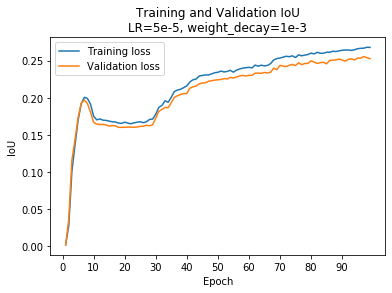

{'Training Check': {'Loss': [3.523517, 3.513611, 3.501481, 3.487336, 3.471146, 3.453727, 3.434759, 3.412211, 3.389314, 3.362055, 3.331746, 3.302621, 3.278667, 3.256909, 3.236297, 3.21861, 3.205027, 3.192305, 3.180109, 3.167105, 3.159131, 3.150854, 3.140596, 3.133048, 3.127321, 3.12293, 3.117305, 3.107543, 3.104435, 3.099488, 3.090963, 3.082011, 3.069842, 3.065987, 3.058638, 3.04434, 3.038445, 3.032526, 3.025024, 3.022029, 3.010938, 3.009002, 3.00506, 2.995848, 2.992963, 2.985983, 2.984317, 2.979394, 2.974478, 2.972174, 2.966928, 2.968015, 2.963769, 2.960852, 2.962676, 2.957812, 2.955702, 2.952066, 2.950611, 2.949613, 2.94965, 2.942145, 2.943005, 2.941539, 2.941591, 2.939591, 2.941599, 2.938121, 2.934849, 2.935495, 2.931376, 2.928004, 2.931158, 2.927264, 2.929907, 2.922378, 2.923261, 2.923855, 2.92101, 2.918097, 2.917616, 2.914583, 2.915506, 2.918327, 2.917365, 2.914694, 2.91627, 2.913709, 2.913715, 2.913215, 2.911165, 2.913729, 2.911292, 2.909121, 2.907386, 2.906319, 2.907915, 2.906497

In [38]:
fp='/content/CSE253/PA3/Base_LR00005/model_output_02_14_11_16.txt'
res = {
    'Training Check': {'Loss': [], 'Accuracy': [], 'IoU': []},
    'Validation Results': {'Loss': [], 'Accuracy': [], 'IoU': []},
    'Test Results': {'Loss': [], 'Accuracy': [], 'IoU': []},
    'Best Loss': {'Loss': []}
    }
parse_file(fp, res)
print_plot(res, 'Loss', file_name='Base_TL_Loss', name="Training and Validation Loss\nLR=5e-5, weight_decay=1e-3")
print_plot(res, 'Accuracy', file_name='Base_TL_Accuracy', name="Training and Validation Accuracy\nLR=5e-5, weight_decay=1e-3")
print_plot(res, 'IoU', file_name='Base_TL_IoU', name="Training and Validation IoU\nLR=5e-5, weight_decay=1e-3")
print(res)

82


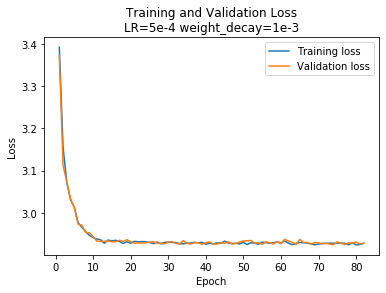

82


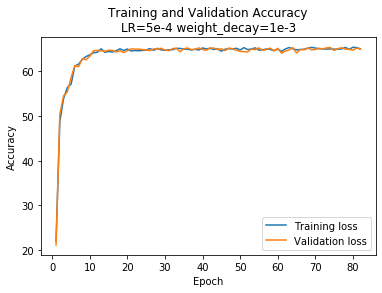

82


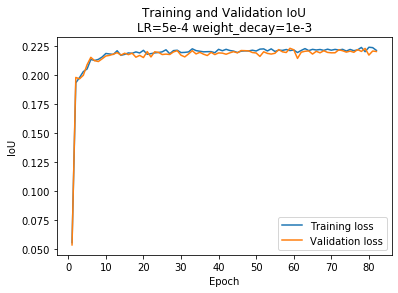

{'Training Check': {'Loss': [3.39218, 3.155427, 3.071912, 3.0302, 3.013466, 2.97663, 2.965817, 2.955885, 2.946734, 2.941614, 2.93805, 2.936069, 2.927969, 2.935533, 2.933745, 2.934964, 2.932075, 2.927555, 2.931349, 2.928079, 2.932544, 2.931392, 2.931996, 2.931349, 2.929969, 2.92708, 2.930818, 2.926535, 2.929974, 2.9308, 2.929861, 2.929502, 2.926817, 2.926598, 2.928203, 2.928537, 2.930195, 2.928545, 2.930347, 2.925571, 2.927869, 2.926396, 2.929017, 2.92767, 2.932939, 2.928428, 2.927555, 2.927814, 2.926408, 2.930185, 2.924949, 2.929271, 2.928066, 2.925488, 2.930602, 2.92957, 2.927941, 2.928798, 2.931475, 2.928353, 2.933191, 2.928088, 2.924688, 2.927599, 2.929852, 2.929127, 2.928492, 2.926601, 2.924355, 2.925855, 2.927662, 2.927656, 2.928152, 2.927833, 2.928412, 2.928304, 2.927965, 2.924378, 2.929153, 2.924034, 2.924869, 2.927675], 'Accuracy': [22.020974, 48.684023, 53.906056, 56.36163, 57.132178, 61.168469, 61.618128, 62.671775, 63.316543, 63.693236, 64.161354, 64.261375, 65.037027, 64.26

In [37]:
fp='/content/drive/My Drive/CSE253/PA3/Base_TL/model_output_02_15_21_27.txt'
res = {
    'Training Check': {'Loss': [], 'Accuracy': [], 'IoU': []},
    'Validation Results': {'Loss': [], 'Accuracy': [], 'IoU': []},
    'Test Results': {'Loss': [], 'Accuracy': [], 'IoU': []},
    'Best Loss': {'Loss': []}
    }
parse_file(fp, res)
print_plot(res, 'Loss', file_name='Base_TL_Loss', name="Training and Validation Loss\nLR=5e-4, weight_decay=1e-3")
print_plot(res, 'Accuracy', file_name='Base_TL_Accuracy', name="Training and Validation Accuracy\nLR=5e-4, weight_decay=1e-3")
print_plot(res, 'IoU', file_name='Base_TL_IoU', name="Training and Validation IoU\nLR=5e-4, weight_decay=1e-3")
print(res)